In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

In [3]:
X_train, y_train = load_boston(return_X_y=True)

In [4]:
def model_cv_creator(estimator, param_grid):
    model = GridSearchCV(estimator=estimator,
                         param_grid=param_grid,
                         scoring=['explained_variance', 'r2'],
                         n_jobs=-1,
                         return_train_score=True,
                         refit=False,
                         rand
                       );
    model.fit(X_train, y_train);
    _cv_res = pd.DataFrame(model.cv_results_)
    table = _cv_res[
        [a for a in _cv_res.columns if 'param_' in a] + ['mean_test_r2', 'mean_test_explained_variance']
        ].sort_values(['mean_test_r2', 'mean_test_explained_variance',], ascending=False)
    return model, table

<div dir=rtl>
    <font size=10 color=red>
   LinearSVR
    </font>
</div>

<div dir=rtl>
    <font size=5>
        براساس پارامترهای مدل سه مورد انتخاب شده که  شامل حل مستقیم معادله SVR یا فرم دوگان آن هست.
        پارامتر دوم نحوه اعمال پنالتی هست و پارامتر C هم که ضریب جریمه در مدل
    </font>
    </div>

In [56]:
LinearSVR_param = {'dual':[False, True],
                   'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'],
                   'C':10. ** np.arange(-2,3),
                  }
model_LinearSVR, LinearSVR_cv_results = model_cv_creator(LinearSVR( max_iter=10000), param_grid=LinearSVR_param);
LinearSVR_cv_results

c:\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan  0.44893203 -0.51966791  0.46402436         nan  0.47146351
  0.51674953  0.47006237         nan  0.46952976  0.40571791  0.43084084
         nan  0.48257449  0.39861329  0.45339878         nan  0.46875394
  0.36895561  0.42573814]
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan 0.70501607 0.53636922 0.70787207        nan 0.71409907
 0.69224293 0.70191475        nan 0.71351482 0.6980038  0.6896903
        nan 0.71331746 0.65363555 0.68982063        nan 0.7141129
 0.66646426 0.62744015]
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan  0.41272265 -1.17833118  0.37783299         nan  0.42719727
  0.41068444 

,param_C,param_dual,param_loss,mean_test_r2,mean_test_explained_variance
13,10.0,False,squared_epsilon_insensitive,0.435496,0.482574
5,0.1,False,squared_epsilon_insensitive,0.427197,0.471464
9,1.0,False,squared_epsilon_insensitive,0.421739,0.469530
17,100.0,False,squared_epsilon_insensitive,0.421485,0.468754
1,0.01,False,squared_epsilon_insensitive,0.412723,0.448932
6,0.1,True,epsilon_insensitive,0.410684,0.516750
3,0.01,True,squared_epsilon_insensitive,0.377833,0.464024
11,1.0,True,squared_epsilon_insensitive,0.328159,0.430841
7,0.1,True,squared_epsilon_insensitive,0.310353,0.470062
15,10.0,True,squared_epsilon_insensitive,0.291509,0.453399


<div dir=rtl>
    <font size=5>
        بر اساس جدول بالا حل مدل مستقیم مدل با خطای مرتبه اول [epsilon_insensitive] موجب واگرایی شده. و چون اثر مدل خطاها قابل تشخیص نیست ادامه بررسی را روی حالت دوگان قرار داده شده است.
    </font>
</div>

In [57]:
LinearSVR_param = {
                   'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'],
                   'C':10. ** np.arange(-4,5),
                  }
model_LinearSVR, LinearSVR_cv_results = model_cv_creator(LinearSVR( max_iter=10000), param_grid=LinearSVR_param)
LinearSVR_cv_results

,param_C,param_loss,mean_test_r2,mean_test_explained_variance
6,0.1,epsilon_insensitive,0.475892,0.514544
17,10000.0,squared_epsilon_insensitive,0.442535,0.472416
13,100.0,squared_epsilon_insensitive,0.335478,0.454139
15,1000.0,squared_epsilon_insensitive,0.331404,0.474343
5,0.01,squared_epsilon_insensitive,0.317117,0.450639
10,10.0,epsilon_insensitive,0.314553,0.456703
12,100.0,epsilon_insensitive,0.298676,0.447798
14,1000.0,epsilon_insensitive,0.187309,0.423059
11,10.0,squared_epsilon_insensitive,0.039129,0.452284
7,0.1,squared_epsilon_insensitive,-0.026842,0.467843


<div dir=rtl>
    <font size=5>
    مدل خطی سرعت بالایی در مرحله یادگیری داشت اما بهترین امتیاز کسب شده اون چندان بالا نیست و پارامترهای مدل هم چندان تاثیری روی این دقت نداشتن.
    </font>
</div>

<div dir=rtl>
    <font size=10 color=red>
   SVR
    </font>
</div>

<div dir=rtl>
    <font size=6 color=blue>
   - kernel:  rbf
    </font>
</div>

<div dir=rtl>
    <font size=5>
    در قدم اول با کرنل گوسی و گاما به صورت یک روی (n_features * X.var()) به بررسی عملکرد مدل پرداخته شده است
    </font>
</div>

In [9]:
SVR_param = {'C':10. ** np.arange(-4,6),
            }
model_SVR , SVR_cv_results = model_cv_creator(SVR(), param_grid=SVR_param)

In [10]:
SVR_cv_results

,param_C,mean_test_r2,mean_test_explained_variance
8,10000.0,0.513321,0.573580
7,1000.0,0.311235,0.450046
6,100.0,0.066851,0.241260
5,10.0,-0.071171,0.106005
4,1.0,-0.090307,0.078273
9,100000.0,-0.187001,0.050859
3,0.1,-0.306963,0.047030
2,0.01,-0.529783,0.009275
1,0.001,-0.577003,0.001009
0,0.0001,-0.583403,0.000101


<div dir=rtl>
    <font size=5>
        در اینجا مدل گوسی حساسیت بالایی به مقدار C از خود نشان داده و در مقدار عددی بالایی نیز به بهترین مقدار خود رسیده که کمی از حالت مدل خطی بهتر است.
    </font>
</div>

In [11]:
SVR_param = {'C':np.linspace(2_000, 100_000, 10)
            }
model_SVR , SVR_cv_results = model_cv_creator(SVR(), param_grid=SVR_param)

In [12]:
SVR_cv_results

,param_C,mean_test_r2,mean_test_explained_variance
2,23777.777778,0.534346,0.584994
1,12888.888889,0.532587,0.588980
3,34666.666667,0.471651,0.535586
4,45555.555556,0.383460,0.467555
0,2000.0,0.379809,0.490813
5,56444.444444,0.304200,0.408495
6,67333.333333,0.216777,0.344640
7,78222.222222,0.041328,0.221789
8,89111.111111,-0.121939,0.106522
9,100000.0,-0.187001,0.050859


<div dir=rtl>
    <font size=5>
        بر اساس مدل بالا برای C بهترین محدوده ناحیه ده تا سی هزار هست. در مرحله بعد روی پارامتر گاما نیز یه جستجو انجام داده شده است.
    </font>
</div>

<div dir=rtl>
    <font size=5>
        مقدار گامای استفاده شده در گام قبل برابر:
    </font>
</div>

In [17]:
1 / (X_train.shape[1] * X_train.var())

3.650811612345056e-06

In [28]:
SVR_param = {'gamma':np.linspace(1e-6, 1e-5, 10),
            }
model_SVR , SVR_cv_results = model_cv_creator(SVR(C=24_000), param_grid=SVR_param)
SVR_cv_results

,param_gamma,mean_test_r2,mean_test_explained_variance
3,0.000004,0.538190,0.591708
4,0.000005,0.502415,0.560323
2,0.000003,0.497871,0.550667
5,0.000006,0.489866,0.547865
6,0.000007,0.453560,0.508550
7,0.000008,0.397363,0.453542
8,0.000009,0.363159,0.417502
1,0.000002,0.324842,0.425961
9,0.00001,0.308506,0.366922
0,0.000001,0.043730,0.264065


In [29]:
SVR_param = {'gamma':np.linspace(1e-6, 1e-5, 10),
             'C':np.linspace(12_000, 36_000, 10),
            }
model_SVR , SVR_cv_results = model_cv_creator(SVR(), param_grid=SVR_param)
SVR_cv_results

,param_C,param_gamma,mean_test_r2,mean_test_explained_variance
5,12000.0,0.000006,0.550621,0.606531
14,14666.666667,0.000005,0.545755,0.600089
4,12000.0,0.000005,0.545229,0.601966
24,17333.333333,0.000005,0.543812,0.595940
43,22666.666667,0.000004,0.537930,0.590802
...,...,...,...,...
50,25333.333333,0.000001,0.041025,0.263831
60,28000.0,0.000001,0.016205,0.247765
70,30666.666667,0.000001,0.016110,0.246302
80,33333.333333,0.000001,0.014981,0.243416


In [30]:
SVR_param = {'gamma':np.linspace(1e-6, 1e-5, 10),
             'C':np.linspace(9_000, 12_000, 10),
            }
model_SVR , SVR_cv_results = model_cv_creator(SVR(), param_grid=SVR_param)
SVR_cv_results

,param_C,param_gamma,mean_test_r2,mean_test_explained_variance
95,12000.0,0.000006,0.550621,0.606531
85,11666.666667,0.000006,0.550609,0.607083
75,11333.333333,0.000006,0.550290,0.607775
65,11000.0,0.000006,0.549310,0.607330
55,10666.666667,0.000006,0.548089,0.607438
...,...,...,...,...
30,10000.0,0.000001,0.204659,0.362344
90,12000.0,0.000001,0.203508,0.361219
60,11000.0,0.000001,0.200692,0.360764
40,10333.333333,0.000001,0.199602,0.359236


<div dir=rtl>
    <font size=5>
    با کرنل گوسی در مراحل جستجوی بالا بهترین دقت عدد 0.55 بدست آمده است.
    </font>
</div>

<div dir=rtl>
    <font size=6 color=blue>
   -   kernel: polynomial
    </font>
</div>

In [33]:
SVR_param = {'degree':range(2,7),
             'C':10. ** np.arange(2,5),
            }
model_SVR , SVR_cv_results = model_cv_creator(SVR(kernel='poly'), param_grid=SVR_param)
SVR_cv_results

,param_C,param_degree,mean_test_r2,mean_test_explained_variance
11,10000.0,3,0.490501,0.548307
6,1000.0,3,0.262845,0.418797
0,100.0,2,0.019889,0.216895
1,100.0,3,-0.035062,0.221974
10,10000.0,2,-0.065661,0.215534
2,100.0,4,-0.107106,0.179758
5,1000.0,2,-0.135452,0.166744
12,10000.0,4,-0.141405,0.153870
3,100.0,5,-0.367122,0.000293
4,100.0,6,-0.436318,-0.043238


In [35]:
SVR_param = {'degree':range(2,7),
             'C':10. ** np.arange(5,7),
            }
model_SVR , SVR_cv_results = model_cv_creator(SVR(kernel='poly', degree=3), param_grid=SVR_param)
SVR_cv_results

,param_C,mean_test_r2,mean_test_explained_variance
0,100000.0,-3.423235,-2.033849
1,1000000.0,-6.962044,-6.699085


In [37]:
SVR_param = {'gamma':np.linspace(1e-6, 1e-5, 10),
             'C':np.linspace(1e3,1e4,5),
            }
model_SVR , SVR_cv_results = model_cv_creator(SVR(kernel='poly', degree=3), param_grid=SVR_param)
SVR_cv_results

,param_C,param_gamma,mean_test_r2,mean_test_explained_variance
8,1000.0,0.000009,0.524874,0.571658
15,3250.0,0.000006,0.524611,0.571674
24,5500.0,0.000005,0.522882,0.570628
43,10000.0,0.000004,0.516287,0.568470
34,7750.0,0.000005,0.486284,0.559579
9,1000.0,0.00001,0.472851,0.553289
7,1000.0,0.000008,0.460855,0.535548
33,7750.0,0.000004,0.443398,0.525120
16,3250.0,0.000007,0.429086,0.527468
25,5500.0,0.000006,0.390478,0.505430


In [46]:
SVR_param = {'coef0':10. ** np.arange(-4,1)}
model_SVR , SVR_cv_results = model_cv_creator(SVR(C=1e3, gamma=0.000009, kernel='poly', degree=3), param_grid=SVR_param)
SVR_cv_results

,param_coef0,mean_test_r2,mean_test_explained_variance
2,0.01,0.539947,0.592764
1,0.001,0.531742,0.579616
0,0.0001,0.525658,0.573157
3,0.1,0.437588,0.526981
4,1.0,-0.317570,-0.155384


<div dir=rtl>
    <font size=5>
    اینجا هم در عمل به دقت نزدیک به مدل گوسی رسیدیم که البته همچنان دقت پایینی است.
    </font>
</div>

In [47]:
import seaborn as sns

In [49]:
model_SVRt = SVR(C=1e3, gamma=0.000009, kernel='poly', degree=3, coef0=0.01).fit(X_train, y_train)

<AxesSubplot:>

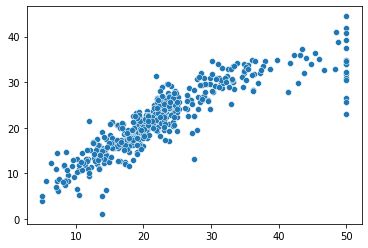

In [50]:
sns.scatterplot(x=y_train, y=model_SVRt.predict(X_train))

In [51]:
model_SVRt = SVR(C=12_000, gamma=0.000006).fit(X_train, y_train)

<AxesSubplot:>

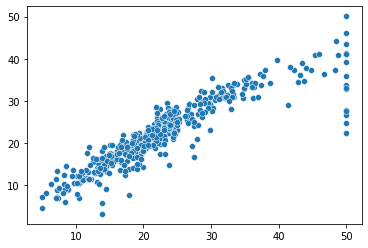

In [52]:
sns.scatterplot(x=y_train, y=model_SVRt.predict(X_train))